## How to install:
`pip install pandas` (in linux / mac)

## Documentation:
https://pandas.pydata.org/pandas-docs/stable/

## Download the data set:
We will use Titanic dataset, you can down load it from:

https://www.kaggle.com/c/titanic/data

## Exploring the data:

In [142]:
cat ../data/titanic_train.csv | head

In [143]:
cat ../data/titanic_train.csv | wc -l

892


In [144]:
data_path = '../data/titanic_train.csv'

import pandas as pd
df = pd.read_csv(data_path, header=0)

# see all different df types:
df.ftypes

PassengerId      int64:dense
Survived         int64:dense
Pclass           int64:dense
Name            object:dense
Sex             object:dense
Age            float64:dense
SibSp            int64:dense
Parch            int64:dense
Ticket          object:dense
Fare           float64:dense
Cabin           object:dense
Embarked        object:dense
dtype: object

In [145]:
# or see more info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [146]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [147]:
# how many rows / columns
df.shape

(891, 12)

In [148]:
# count how many had survived:
pd.value_counts(df['Survived'].values)

0    549
1    342
dtype: int64

## Some basic plotting

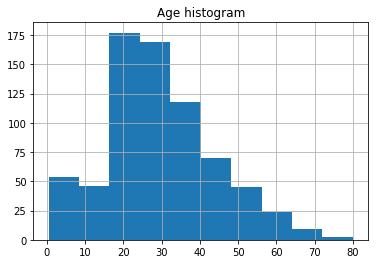

In [149]:
# see an histogram of ages
import pylab as P
df['Age'].hist()
P.title('Age histogram')
P.show()

0    549
1    342
dtype: int64


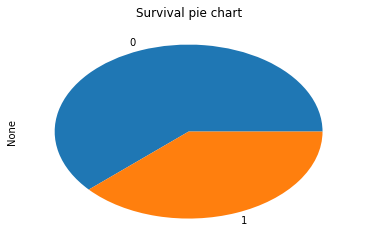

In [150]:
# we cannot plot the 'Survived' column as-it, we must sum it first
# CR - add names to the charts
print pd.value_counts(df['Survived'].values)
pd.value_counts(df['Survived'].values).plot(kind='pie', stacked=True)
P.title('Survival pie chart')
P.show()

In [151]:
# or to do the same using bar plot
# pd.value_counts(df['Survived'].values).plot(kind='bar')
# P.show()

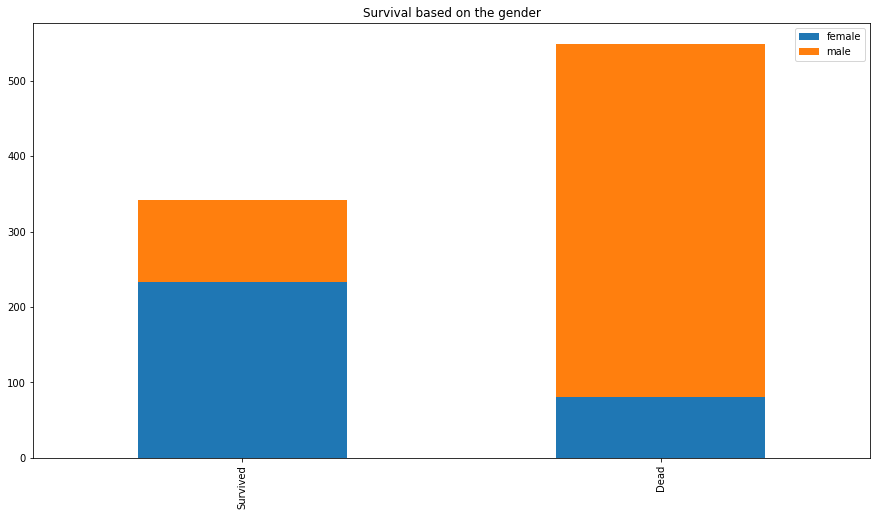

In [152]:
# survival based on the gender.
survived_sex = df[df['Survived']==1]['Sex'].value_counts()
dead_sex = df[df['Survived']==0]['Sex'].value_counts()
df2 = pd.DataFrame([survived_sex,dead_sex])
df2.index = ['Survived','Dead']
df2.plot(kind='bar',stacked=True, figsize=(15,8))
P.title('Survival based on the gender')
P.show()


## Cleaning the data
Before the actual processing, we would like clean the data...

In [153]:
# it is difficult to work with string values such as "male", or "female":

# we will create a new column 'Gender' and will be binary:
df['Gender'] = -1
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,-1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,-1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,-1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,-1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,-1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,-1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,-1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,-1


In [154]:
# set Gender column:
df['Gender'] = df['Sex'].map( {'female' : 0, 'male' : 1} ).astype(int)

# drop the sex column - we don't need it anymore:
df =df.drop(['Sex'], axis=1)


df.head(10)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,C,0


In [155]:
df.count()
# we can see that the age same some missing values. Let's fill them

PassengerId    891
Survived       891
Pclass         891
Name           891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
Gender         891
dtype: int64

In [156]:
df['Age'].head(20)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
Name: Age, dtype: float64

In [157]:
# we will fill the missing value in Age with the mean of the existing values (or maybe the median?)
#df['Age'].median()
# df['Age'].mean()

# we don't want to replace the existing values so for that we'll add a new column 'AllAges' (maybe a better name?)
import numpy as np
df['AllAge'] = df['Age']
#df['AllAge'].fillna(df['Age'].mean())

df['AllAge'].fillna(df['Age'].mean().astype(int), inplace=True)
df.head(20)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AllAge
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,35.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1,35.0
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,Q,1,29.0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,S,1,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,S,1,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,S,0,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,C,0,14.0


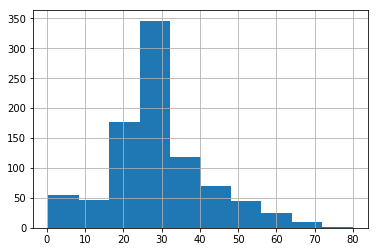

In [158]:
# lets check the age histogram again:
df['AllAge'].hist()
P.show()

In [159]:
# lets do some thing better: instead of filling the both males and females with the same mean value, we will fill males
# with males mean and females with females mean
df['AllAge'] = df['Age']
male_mean = df.loc[df['Gender'] == 1]['Age'].mean().astype(int)
female_mean = df.loc[df['Gender'] == 0]['Age'].mean().astype(int)
print 'male mean: ', male_mean
print 'female mean: ', female_mean


for index, row in df.iterrows():
    if pd.isnull(row['AllAge']):
        if row.Gender == 1:
            df.at[index, 'AllAge'] = male_mean
        else:
            df.at[index,'AllAge'] =female_mean

df.head(20)

male mean:  30
female mean:  27


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AllAge
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,35.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1,35.0
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,Q,1,30.0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,S,1,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,S,1,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,S,0,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,C,0,14.0


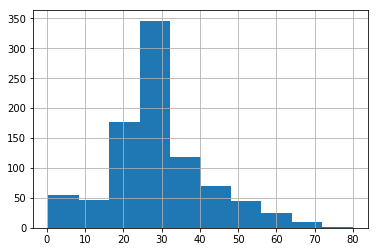

In [160]:
df['AllAge'].hist()
P.show()

In [161]:
# lets add a new featuer: family_size:
# the motivation is to unite similar feature into one
df['FamilySize'] = df['SibSp'] + df['Parch']

# remove the united features
df = df.drop(['SibSp', 'Parch'], axis=1)

df.head(10)

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,Embarked,Gender,AllAge,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,NaN,S,1,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C85,C,0,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,NaN,S,0,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,C123,S,0,35.0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,373450,8.0500,NaN,S,1,35.0,0
5,6,0,3,"Moran, Mr. James",NaN,330877,8.4583,NaN,Q,1,30.0,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,17463,51.8625,E46,S,1,54.0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,349909,21.0750,NaN,S,1,2.0,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,347742,11.1333,NaN,S,0,27.0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,237736,30.0708,NaN,C,0,14.0,1


## Filtering:

In [162]:
# lets find how many children below the age of 10 were of the ship:
below_10 = df[df['Age'] < 10]
len(below_10)

62

In [163]:
# lets check how many of then survived:
below_10['Survived'].value_counts()

1    38
0    24
Name: Survived, dtype: int64

In [164]:
# or in percentage:
below_10['Survived'].value_counts(normalize=True)

1    0.612903
0    0.387097
Name: Survived, dtype: float64

## Pivoting:

In [166]:
# Similar to Excel's PivotTable, pivoting in Pandas enables us to automatically sort,
# count, total, or average the data stored in one table

df.pivot_table(index='Gender', values='Survived')
# 3 out of every 4 woman were saved! looks like "women and children first" works
# (men wern't so lucky)

,Survived
Gender,
0,0.742038
1,0.188908


In [167]:
# upper class women has much more chances to survive!
pd.pivot_table(df,index=['Gender', 'Pclass'], values=['Survived'])

Survived
Gender Pclass          
0      1       0.968085
       2       0.921053
       3       0.500000
1      1       0.368852
       2       0.157407
       3       0.135447

In [169]:
# lets split the passengers into children (under 18) and adults (18+) and see how this effect the 
# survival chances

age = pd.cut(df['Age'], [0, 18, 80])
pd.pivot_table(df,index=['Gender', age], values=['Survived'], aggfunc=np.mean)


Survived
Gender Age               
0      (0, 18]   0.676471
       (18, 80]  0.782383
1      (0, 18]   0.338028
       (18, 80]  0.180628

## Time for some machine learning!
In this section we try to use the cleaned data and predict the survival of the passenger based on the data features


### Splitting the data (Cross validation):
We need to spilt the data into train and test in order to check how accurate our model is

In [178]:
from sklearn.model_selection import train_test_split

# X is all the set of the features we want to predict on
X = df.drop(['Survived', 'PassengerId', 'Name'], axis=1)

# y is the feature we want to be predicted
y = df['Survived']

# split the data 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)


(623, 268, 623, 268)

###  Predicting using  Logistic Regression:
Logistic Regression is a classification algorithm. It's used to predict a binary outcome given a set (of independent) variables.

More info in:

https://en.wikipedia.org/wiki/Logistic_regression

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


#### Logistic Regression - first try

In [179]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# lets try to predict only using 'AllAge' feature:
predictors = ['AllAge']

logreg.fit(df[predictors], df['Survived'])
y_pred = logreg.predict(X_test[predictors])

# how did we do:
logreg.score(X_test[predictors], y_test)

0.58582089552238803

#### Logistic Regression - second try

In [180]:
# this time lets try to predict with more features
predictors = ['AllAge', 'Pclass', 'FamilySize', 'Gender', 'Fare']

logreg.fit(df[predictors], df['Survived'])
y_pred = logreg.predict(X_test[predictors])

logreg.score(X_test[predictors], y_test)

0.80597014925373134

###  Predicting using  Naive Bayes:

Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with naive independence assumptions between the features.

https://en.wikipedia.org/wiki/Naive_Bayes_classifier

http://scikit-learn.org/stable/modules/naive_bayes.html

In [181]:

from sklearn.naive_bayes import GaussianNB

gaussian_nb = GaussianNB()

gaussian_nb.fit(df[predictors], df['Survived'])
y_pred = gaussian_nb.predict(X_test[predictors])

gaussian_nb.score(X_test[predictors], y_test)

0.80223880597014929

###  Predicting using  Random Forest:

Random forests is a learning method for classification, regression and other tasks, that operate by constructing a multitude of random decision trees.

https://en.wikipedia.org/wiki/Random_forest

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://medium.com/@Synced/how-random-forest-algorithm-works-in-machine-learning-3c0fe15b6674

In [182]:
from sklearn.ensemble import RandomForestClassifier


# predictors = ['AllAge', 'Pclass', 'FamilySize', 'Gender', 'Fare']

random_forest = RandomForestClassifier()

random_forest.fit(df[predictors], df['Survived'])
y_pred = random_forest.predict(X_test[predictors])

random_forest.score(X_test[predictors], y_test)


0.97761194029850751